- 雑音（ノイズ）：計測値（センサ値）の変動（e.g. LiDARの計測値）．例えば，LiDARの場合は，外乱光や電気回路中の電圧や電流を乱す"何か（原因は複雑にあって，互いに影響し合っていることが多い）"が影響して雑音が発生する．
- 誤差：何らかの測りたいものの"真の値"とセンサ値の差のこと．
- 偶然誤差（accidental error, random error）：雑音によって発生する誤差のこと．
- 偏り（バイアス）：計測機器の取り付け位置がずれていたり，取り付けた本体が傾いていたりするときに生じるずれのこと．
- 系統誤差（Systematic error）：バイアスによって生じる定常的な誤差のこと．系統誤差の量はセンサ値から推定することができないので，別のセンサや計測方法で突き止める必要がある．しかし，別の計測方法やセンサにも雑音やバイアスが存在する．
- 系統誤差は，アルゴリズムの出力にも悪影響を及ぼす．対策は取りにくいが，バイアスや系統誤差の存在を頭の隅に置いて，ロボットのアルゴリズムを考えていく必要がある．

Pythonのバージョン等のチェック（Python 2系だとコードが動かないため，3系であることを確認）

In [1]:
import sys
sys.version    # Check Python version

Pandasモジュールの"read_csv"関数を使って data という変数に既存の計測データ（ファイル名：sensor_data_200.txt, 計測した日付，時間，光センサの計測値，LiDARの計測値）*を読み込む．

In [2]:
import pandas as pd
data = pd.read_csv("sensor_data_200.txt", delimiter = " ", 
                  header = None, names = ("date", "time", "ir", "lidar"))
data

,date,time,ir,lidar
0,20180122,95819,305,214
1,20180122,95822,299,211
2,20180122,95826,292,199
3,20180122,95829,321,208
4,20180122,95832,298,212
5,20180122,95835,327,212
6,20180122,95838,293,215
7,20180122,95840,309,218
8,20180122,95843,323,208
9,20180122,95846,292,217


In [3]:
print(data["lidar"][0:5])

0    214
1    211
2    199
3    208
4    212
Name: lidar, dtype: int64


続いて，sensor_data_200.txt における，LiDARのセンサ値値の規則性の有無を調べるために，センサ値のヒストグラムの描画を行う．

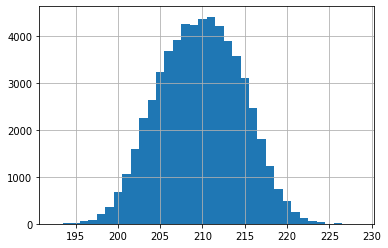

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]), align = 'left')
plt.show()

以下の値を求める．
1. センサ値の平均値を求める．
1. センサ値の分散を求める．
1. センサ値の標準偏差を求める．

なお，分散と標準偏差は各センサ値のばらつきを表す．

センサ値${\bf{Z}}_{LiDAR}$は以下のように表される．
<div style="text-align: center;">
${\bf{Z}}_{LiDAR} = \{ z_{i} | i = 0, 1, 2, \cdots, N-1\}$
</div>
${\bf{Z}}_{LiDAR}$はリスト（ベクトル）を表し，$z_{i}$の$i$は（0からの）要素番号を表し，要素数は$N$となる．

- 標本分散$\sigma^{2}$：集合の要素の値を全て足して，要素数で割ったもの
<div style="text-align: center;">
$\mu = \cfrac{1}{N} \sum_{i = 0}^{N-1} z_{i}$
</div>
- 分散には標本分散$\sigma^{2}$の他に不偏分散$s^{2}$がある．
- 標本分散$\sigma^{2}$は，各センサ値と平均値（$\mu$）の差を二乗したものの平均値なので，各値と平均値（$\mu$）が離れているほど大きくなる．
- 不偏分散$s^{2}$：標本分散$\sigma^{2}$において要素数$N$で割るところを$N-1$で割ったもの．
<div style="text-align: center;">
$\sigma^{2} = \cfrac{1}{N} \sum_{i = 0}^{N-1} (z_{i} - \mu)^{2} \ \ \ (N > 0)$
</div>
<div style="text-align: center;">
$s^{2} = \cfrac{1}{N-1} \sum_{i = 0}^{N-1} (z_{i} - \mu)^{2} \ \ \ (N > 1)$
</div>
- 標本分散$\sigma^{2}$と不偏分散$s^{2}$においては，Nの値が小さい時に違いが現れる．

In [5]:
# 平均値の計算
mean1 = sum(data["lidar"].values)/len(data["lidar"].values)
mean2 = data["lidar"].mean()
print(mean1, mean2)

209.73713297619855 209.73713297619855


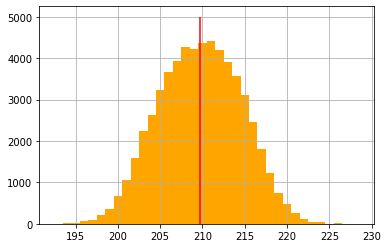

In [6]:
# LiDARのセンサ値のヒストグラムの作成
data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]), 
        color="orange", align = 'left')
plt.vlines(mean1, ymin=(), ymax=5000, color="red")
plt.show()

sensor_data_200.txt の分散を計算する．以下のコードにおいては，定義から計算した場合，Pandasで計算した場合，Numpyで計算した場合を示している．

各計算結果からPandasとNumpyを使った結果は一致していることがわかる．
Pythonでは定義から計算するよりも，PandasやNumpyを使って計算することが推奨されており，計算速度もそちらの方が速い．

In [7]:
# 定義から計算
zs = data["lidar"].values # 要素数(N)
mean = sum(zs) / len(zs)  # $mu$（=mean）
diff_square = [(z - mean)**2 for z in zs]

sampling_var = sum(diff_square) / (len(zs))     # 標本分散
unbiased_var = sum(diff_square) / (len(zs) - 1) # 不偏分散

print(sampling_var) # 定義から計算した標本分散を表示
print(unbiased_var) # 定義から計算した不偏分散を表示

# Pandasで計算
pandas_sampling_var = data["lidar"].var(ddof = False) # 標本分散
pandas_default_var = data["lidar"].var()              # 不偏分散

print(pandas_sampling_var) # 定義から計算した標本分散を表示
print(pandas_default_var)  # 定義から計算した不偏分散を表示

# Numpyで計算
import numpy as np

numpy_default_var = np.var(data["lidar"])            # 標本分散
numpy_unbiased_var = np.var(data["lidar"], ddof = 1) # 不偏分散

print(numpy_default_var)
print(numpy_unbiased_var)

23.407709770274106
23.40810659855441
23.4077097702742
23.408106598554504
23.4077097702742
23.408106598554504


続いて標準偏差$\sigma$を求める（標準偏差$\sigma$は標本分散$\sigma^2$の正の平方根）．

計算結果から，Pandasは不偏分散を用いて標準偏差を求めていることがわかる．

In [8]:
import math

# 定義から計算
stddev1 = math.sqrt(sampling_var)
stddev2 = math.sqrt(unbiased_var)

# Pandasで計算
pandas_stddev = data["lidar"].std() # Pandas calculates standard deviation from unbiased variance

print(stddev1)
print(stddev2)
print(pandas_stddev)

4.838151482774605
4.83819249292072
4.838192492920729


- 確率：値の出やすさを数値化したもの

まず，各センサ値の頻度を集計してみます．

以下では，value_countsでlidar列のセンサ値の頻度を数え上げて，pd.DataFrameでデータフレームにしています．

In [9]:
freqs = pd.DataFrame(data["lidar"].value_counts())
freqs.transpose() # Output horizontally

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409,4355,4261,4228,4201,3920,3897,3674,3572,3225,...,84,59,55,32,15,13,10,4,3,1


続いて，freqsに確率の列を追加してみます．

1行目で，lidar列に入っているそれぞれの頻度を，dataの要素数で割っています．

In [10]:
freqs["probs"] = freqs["lidar"]/len(data["lidar"])
freqs.transpose()

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409.000000,4355.000000,4261.000000,4228.000000,4201.000000,3920.000000,3897.000000,3674.000000,3572.000000,3225.000000,...,84.000000,59.000,55.000000,32.000000,15.000000,13.00000,10.00000,4.000000,3.000000,1.000000
probs,0.074744,0.073829,0.072235,0.071676,0.071218,0.066454,0.066064,0.062284,0.060555,0.054672,...,0.001424,0.001,0.000932,0.000542,0.000254,0.00022,0.00017,0.000068,0.000051,0.000017


確率の合計が1になっていることを確認します．

In [11]:
sum(freqs["probs"])

1.0

出力結果を並べ替えて，横軸にセンサ値を，縦軸に確率を描いてみます．
ヒストグラムと似ていますが，縦軸は頻度ではなく確率であることに注意が必要です．

- 確率質量関数：個別の確率$P(z)$を与える関数$P$
- 確率分布：各変数に対して確率がどのように分布するのかを表す実体

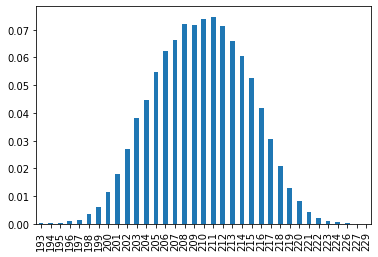

In [12]:
freqs["probs"].sort_index().plot.bar()
plt.show() # The vertical axis changes from frequency to establishment

確率分布を用いたシミュレーションを行ってみます．

シミュレーションでは，先に求めた確率分布（$P_{{\bf{Z}}LiDAR}$と記する）に従って$z$を選びます．
Pandasでは，sampleメソッドを使用することで確率分布から値を選ぶことができます．

In [13]:
def drawing(): # Define as a function
    return freqs.sample(n = 1, weights = "probs").index[0]

drawing() # meaning of execution, not drawing graph

206

sampleの引数nが選ぶ個数，weights = "probs"がデータフレームの"probs"の列に選ぶときの確率が入っていることを意味しています．
sampleの後ろの.index[0]は，データフレームのレコードの名前（この場合はセンサ値）を取り出すためのもので，これによってセンサ値を得ることができます．

上記の処理を数式で表すと
<div style="text-align: center;">
$z_{N} \sim P_{{\bf{Z}}LiDAR}$
</div>
となります．

ここで，左辺の$z_{N}$は実際に選ばれた値を表します．

Pandasでsampleメソッドを使って確率分布から値を選ぶことが可能です．N-1回目までのセンサ値で作った分布から$z_{N}$を発生させるには以下のようにします．

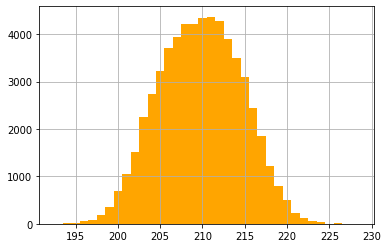

In [14]:
samples = [drawing() for i in range(len(data))]
# samples = [drawing() for i in range(100)]
simulated = pd.DataFrame(samples, columns = ["lidar"])
p = simulated["lidar"]
p.hist(bins = max(p) - min(p), color = "orange", align = 'left')
plt.show()

- ドローイング（drawing）：母集団から個々のものを抽出すること
- サンプリング（sampling）：母集団から集団の一部を抽出すること